# Quantum Prisoner's Dilemma #

In [69]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Initializing states

In [70]:
C = np.array([1,0])
D = np.array([0,1])

CC = np.kron(C,C)
DD = np.kron(D,D)

In [71]:
# To find conjugate transpose
def H(j):
    return j.conjugate().T

### Initializing operator $\hat{J}$

In [72]:
def J(g):
    j = np.zeros((4,4), dtype = complex)
    for i in range(4):
        j[i][i] = cos(g/2)
    j[0][3] = -1j*sin(g/2)
    j[1][2] = 1j*sin(g/2)
    j[2][1] = 1j*sin(g/2)
    j[3][0] = -1j*sin(g/2)
    return j

### Strategy Operator $\hat{U}(\theta, \Phi)$

In [73]:
def U(theta, phi):
    u = np.array([[np.exp(1j*phi)*cos(theta/2), sin(theta/2)], 
                  [-sin(theta/2), np.exp(-1j*phi)*cos(theta/2)]])
    return u

### final state $\mid\psi_f\rangle$

In [74]:
def Psi(J, Ua, Ub):
    psi = np.matmul(np.matmul(H(J), np.kron(Ua,Ub)),np.matmul(J, CC))
    return psi

### Expected payoff ($)

In [75]:
def expected_payoff(p, psi):
    s = 0
    for i in range(len(p)):
        s += p[i]*(abs(psi[i]))**2
    return s

In [76]:
# For plotting

def payoff_plot(gamma, p, x, y):
    
    j = J(gamma)
    Ua = U(x*pi,0) if x >= 0 else U(0,-x*pi/2)
    Ub = U(y*pi,0) if y >= 0 else U(0,-y*pi/2)
    psi = Psi(j,Ua,Ub)
    s = expected_payoff(p, psi)
    return s

### Payoff matrix

In [77]:
payoff = np.array([[3, 0, 5, 1],[3, 5, 0, 1]])

# for alice
a = payoff[0]

## Alice's payoff in a separable game ($\gamma$ = 0)

In [78]:

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
def alice(x, y):

    s = payoff_plot(0, a, x, y)
    return s
v = np.vectorize(alice)
X, Y = np.meshgrid(x, y)
Z = v(X, Y)


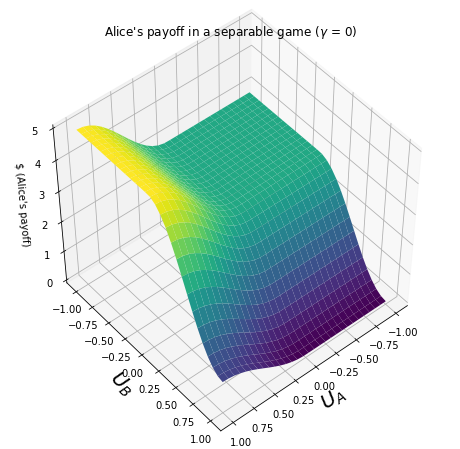

In [79]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$U_A$", fontsize=20)
ax.set_ylabel("$U_B$", fontsize=20)
ax.set_zlabel("$ (Alice's payoff)")
ax.set_title("Alice's payoff in a separable game ($\gamma$ = 0)")
ax.view_init(50, 50)

## Alice's payoff in a maximally entangled ($\gamma = \frac{\pi}{2}$)

In [85]:

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
def alice(x, y):

    s = payoff_plot(pi/2, a, x, y)
    return s
v = np.vectorize(alice)
X, Y = np.meshgrid(x, y)
Z = v(X, Y)


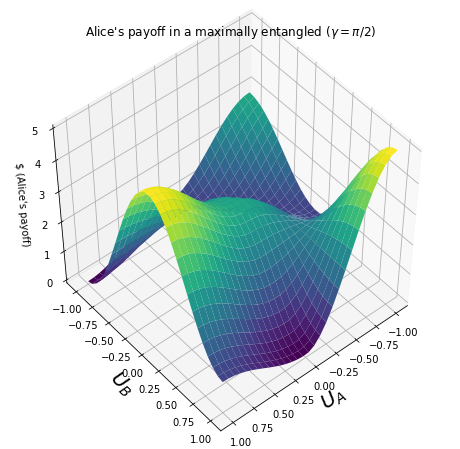

In [86]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$U_A$", fontsize=20)
ax.set_ylabel("$U_B$", fontsize=20)
ax.set_zlabel("$ (Alice's payoff)")
ax.set_title("Alice's payoff in a maximally entangled ($\gamma = \pi/2$)")
ax.view_init(50, 50)